# Part 1: Exploring stock pairs

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
tickers=table[0]['Symbol']
tickers=list(tickers)


In [3]:
import datetime
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2015, 1, 1)

data = yf.download(tickers, start=start, end=end)['Adj Close']

[*********************100%***********************]  503 of 503 completed

25 Failed downloads:
- SEDG: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- QRVO: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- BF.B: No data found for this date range, symbol may be delisted
- CDAY: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- ETSY: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- LW: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- DOW: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- VICI: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- HPE: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- WRK: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- KHC: Data doesn't exist for startDate = 946702800, endDate = 1420088400
- IR: Data doesn't ex

In [4]:
index=data.index.tolist()
index

[Timestamp('2000-01-03 00:00:00'),
 Timestamp('2000-01-04 00:00:00'),
 Timestamp('2000-01-05 00:00:00'),
 Timestamp('2000-01-06 00:00:00'),
 Timestamp('2000-01-07 00:00:00'),
 Timestamp('2000-01-10 00:00:00'),
 Timestamp('2000-01-11 00:00:00'),
 Timestamp('2000-01-12 00:00:00'),
 Timestamp('2000-01-13 00:00:00'),
 Timestamp('2000-01-14 00:00:00'),
 Timestamp('2000-01-18 00:00:00'),
 Timestamp('2000-01-19 00:00:00'),
 Timestamp('2000-01-20 00:00:00'),
 Timestamp('2000-01-21 00:00:00'),
 Timestamp('2000-01-24 00:00:00'),
 Timestamp('2000-01-25 00:00:00'),
 Timestamp('2000-01-26 00:00:00'),
 Timestamp('2000-01-27 00:00:00'),
 Timestamp('2000-01-28 00:00:00'),
 Timestamp('2000-01-31 00:00:00'),
 Timestamp('2000-02-01 00:00:00'),
 Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-02-03 00:00:00'),
 Timestamp('2000-02-04 00:00:00'),
 Timestamp('2000-02-07 00:00:00'),
 Timestamp('2000-02-08 00:00:00'),
 Timestamp('2000-02-09 00:00:00'),
 Timestamp('2000-02-10 00:00:00'),
 Timestamp('2000-02-

In [5]:
df=data.copy()

In [6]:
df[df['A'].isna()].index.tolist()# 2001-09-12 has no data
df=df.drop(pd.Timestamp('2001-09-12 00:00:00'),axis=0) #remove NaN 
df=df.dropna(axis='columns') #remove tickers having no data

In [7]:
df = np.log(df) #log price

In [8]:
# Divide into three periods for testing cointegration seperatley
df1=df.loc[pd.Timestamp('2001-01-01 00:00:00'):pd.Timestamp('2005-01-01 00:00:00')]
df2=df.loc[pd.Timestamp('2005-01-01 00:00:00'):pd.Timestamp('2010-01-01 00:00:00')]
df3=df.loc[pd.Timestamp('2010-01-01 00:00:00'):pd.Timestamp('2015-01-01 00:00:00')]
df1

,A,AAPL,ABC,ABMD,ABT,ADBE,ADI,ADM,ADP,ADSK,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,3.438414,-1.483691,2.266961,3.113515,2.562674,3.145072,3.417147,2.160256,3.426578,1.831735,...,3.582434,1.086169,1.513095,2.208775,2.454572,3.109951,2.431206,1.416020,2.935628,3.741754
2001-01-03,3.536624,-1.387616,2.286788,3.203762,2.540349,3.359957,3.565201,2.116581,3.405203,1.895414,...,3.663725,1.074015,1.553101,2.233407,2.418613,3.065499,2.378563,1.471219,3.037887,3.774577
2001-01-04,3.573786,-1.346488,2.201002,3.119055,2.444241,3.284935,3.520645,2.121036,3.335990,1.966084,...,3.624462,0.929555,1.550647,2.263367,2.345033,3.037244,2.312221,1.473069,3.033884,3.754189
2001-01-05,3.517511,-1.387616,2.165625,3.008155,2.450073,3.242173,3.430358,2.103098,3.303494,1.955365,...,3.583594,0.946676,1.543248,2.259819,2.347493,3.041759,2.322993,1.441142,3.004031,3.742796
2001-01-08,3.484040,-1.376231,2.224782,2.803360,2.439846,3.203826,3.395641,2.164521,3.373852,1.948879,...,3.583594,0.981554,1.533298,2.239471,2.359704,3.037244,2.352898,1.435400,2.988764,3.744877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,2.678728,-0.037702,2.397178,2.626117,2.670411,3.438779,3.158912,2.678977,3.138943,3.623025,...,3.589201,1.930044,2.220986,2.602083,2.225875,3.340732,3.208012,2.485832,4.021057,3.940217
2004-12-28,2.687513,-0.021681,2.413308,2.620311,2.677989,3.460998,3.163061,2.698449,3.144545,3.651959,...,3.597501,1.939694,2.272935,2.612891,2.230248,3.344067,3.227326,2.500622,4.028027,3.940364
2004-12-29,2.702806,-0.017638,2.421966,2.687847,2.688289,3.453752,3.174314,2.681717,3.141412,3.644934,...,3.601439,1.940547,2.343728,2.616319,2.234603,3.345634,3.227326,2.503808,4.030517,3.940217


In [9]:
def cointegration(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2) #testing cointegration
            score = result[0]
            pvalue = result[1] #the lower pvalues, the higher cointegration
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j])) # showing the pairs potential for pair trading
    return score_matrix, pvalue_matrix, pairs

In [10]:
# Randomly choose 100 tickers for testing
import random
random.seed(30)
random_tickers=random.sample(list(df1.keys()),100)

In [11]:
# test cointegration
scores1, pvalues1, pairs1 = cointegration(df1[random_tickers]) # test cointegration from 2000/01/01-2004/12/31
scores2, pvalues2, pairs2 = cointegration(df2[random_tickers]) # test cointegration from 2005/01/01-2009/12/31
scores3, pvalues3, pairs3 = cointegration(df3[random_tickers]) # test cointegration from 2010/01/01-2015/12/31

In [12]:
print('Number of pairs having pvalues < 5%: ',len(pairs1),'\n')
print('Number of pairs having pvalues < 5%: ',len(pairs2),'\n')
print('Number of pairs having pvalues < 5%: ',len(pairs3),'\n')

Number of pairs having pvalues < 5%:  716 

Number of pairs having pvalues < 5%:  359 

Number of pairs having pvalues < 5%:  430 



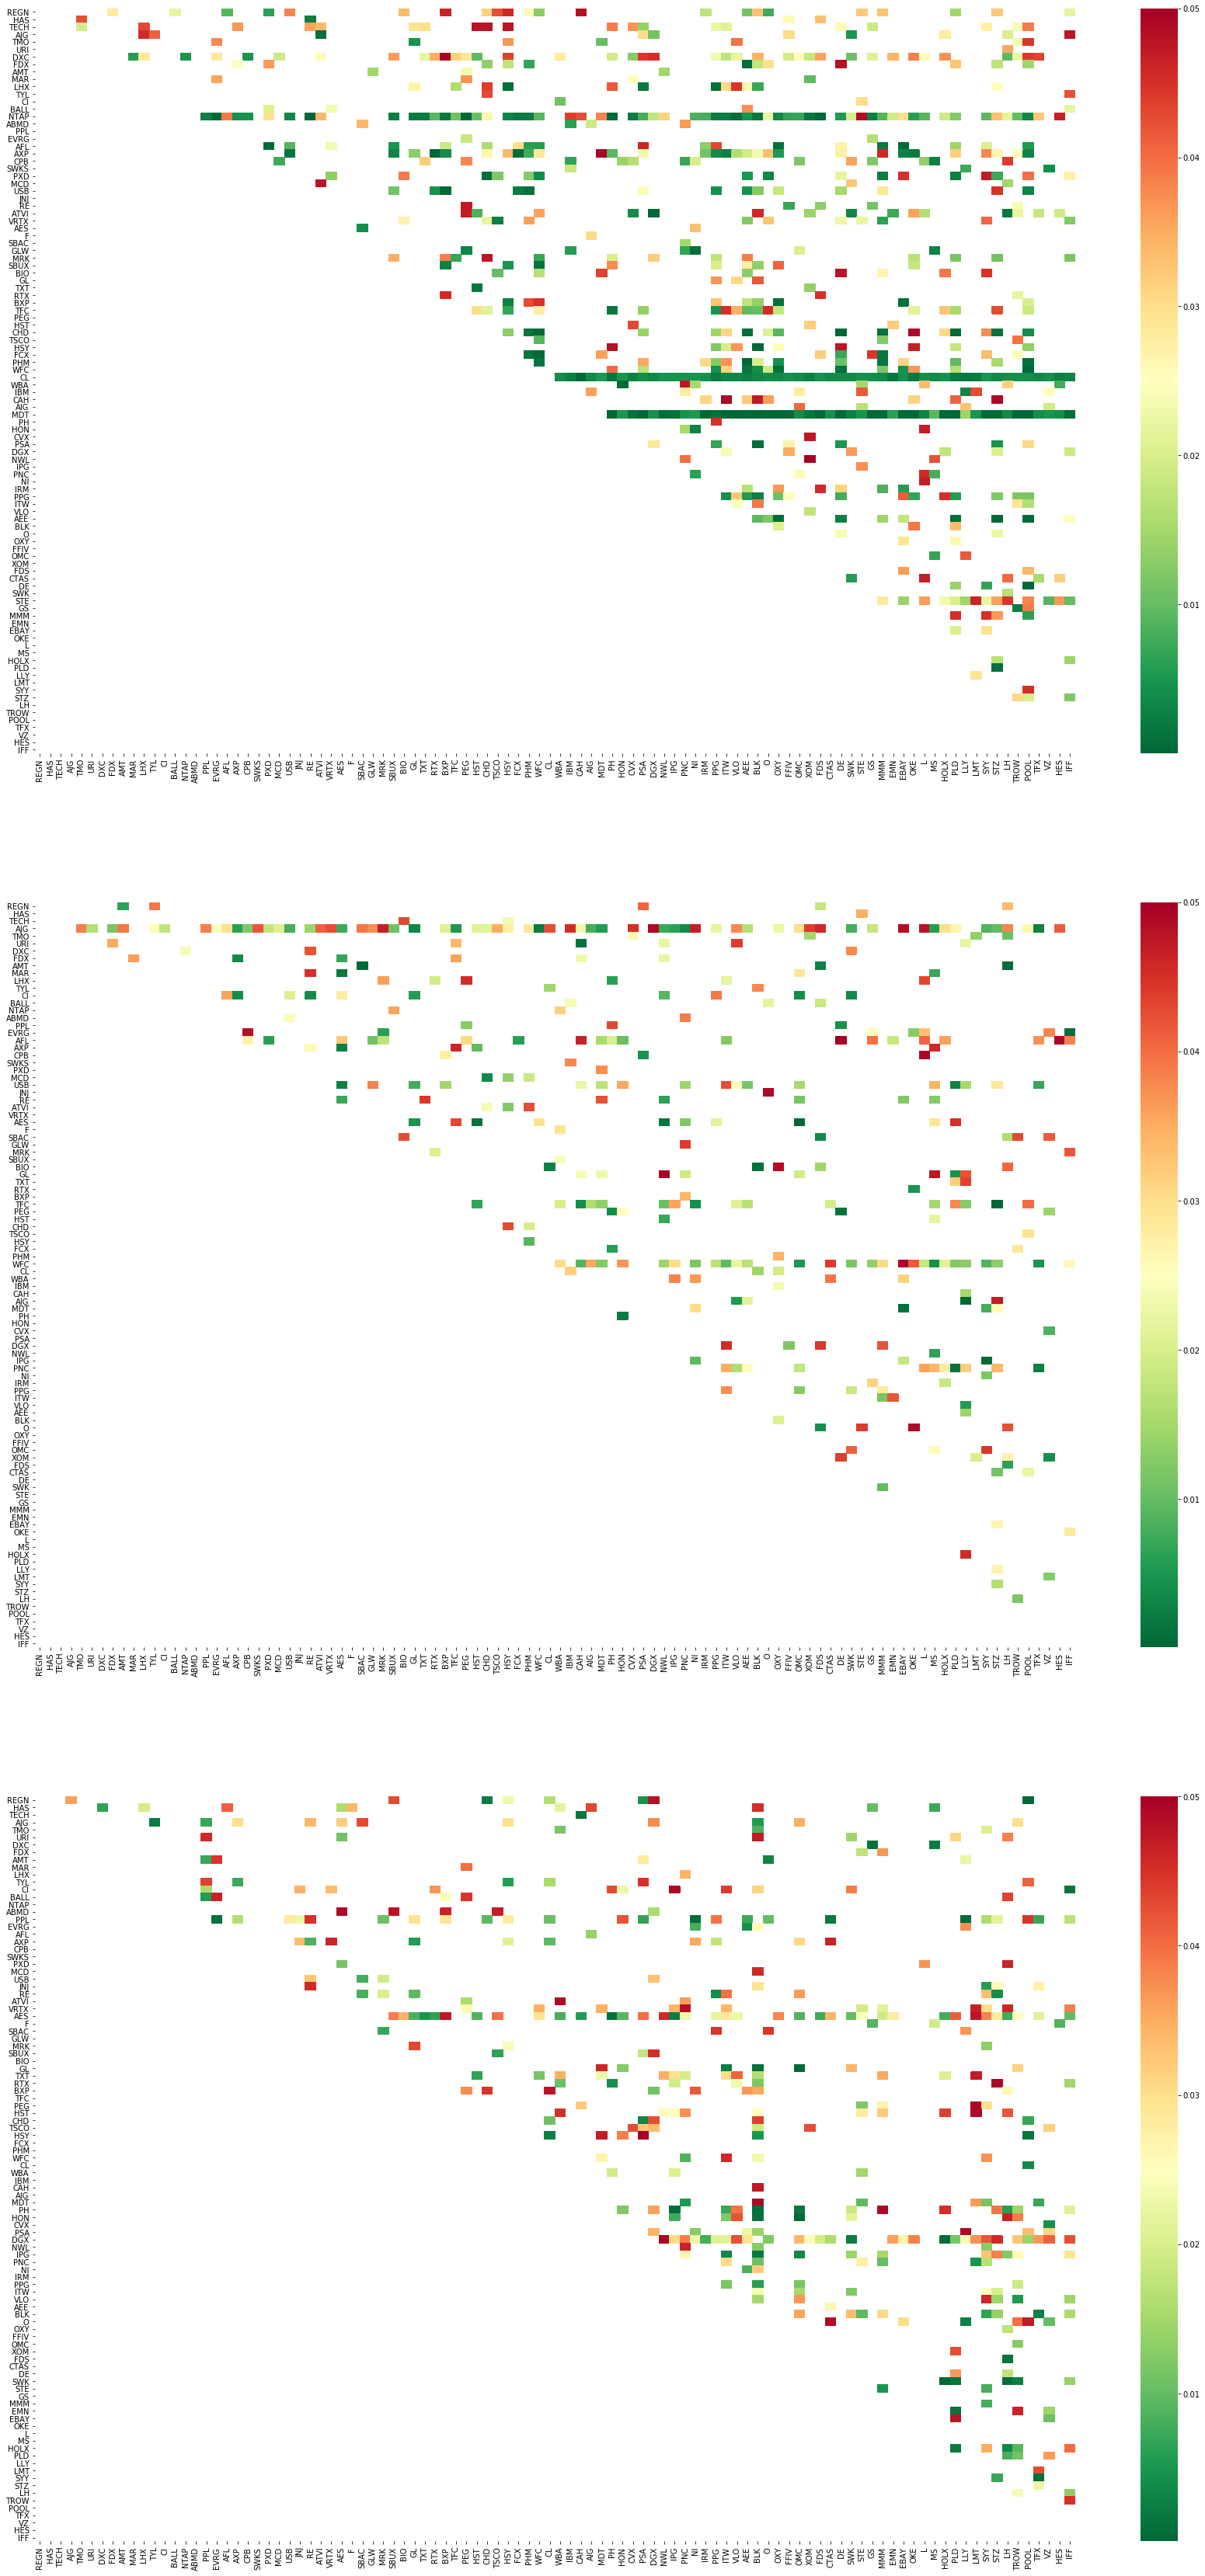

In [13]:
# Heatmap to show the p-values of the cointegration test between each pair of
import seaborn
fig = plt.figure(figsize=(30, 60))
ax = fig.add_subplot(311)
#fig, ax = plt.subplots(figsize=(20,20))
seaborn.heatmap(pvalues1, xticklabels=random_tickers, yticklabels=random_tickers, cmap='RdYlGn_r' , mask=(pvalues1 >= 0.05),vmax=0.05)

ax = fig.add_subplot(312)
seaborn.heatmap(pvalues2, xticklabels=random_tickers, yticklabels=random_tickers, cmap='RdYlGn_r' , mask=(pvalues2 >= 0.05),vmax=0.05)

ax = fig.add_subplot(313)
seaborn.heatmap(pvalues3, xticklabels=random_tickers, yticklabels=random_tickers, cmap='RdYlGn_r' , mask=(pvalues3 >= 0.05),vmax=0.05)

In [14]:
# stocks. Only show the value in the upper-diagonal
#2000/01/01-2004/12/31
cointegration1=pd.DataFrame(pvalues1, index=random_tickers,columns=random_tickers)
print('cointegarion matrix for 2000-2004\n',cointegration1.head())

#2005/01/01-2009/12/31
cointegration2=pd.DataFrame(pvalues2, index=random_tickers,columns=random_tickers)
print('cointegarion matrix for 2015-2009\n',cointegration2.head())

#2010/01/01-2015/12/31
cointegration3=pd.DataFrame(pvalues3, index=random_tickers,columns=random_tickers)
print('cointegarion matrix for 2010-2014\n',cointegration3.head())

cointegarion matrix for 2000-2004
       REGN       HAS      TECH       AJG       TMO       URI       DXC  \
REGN   1.0  0.361808  0.282268  0.413262  0.236635  0.472049  0.546041   
HAS    1.0  1.000000  0.216778  0.070334  0.042440  0.613183  0.184866   
TECH   1.0  1.000000  1.000000  0.132478  0.019585  0.299573  0.134398   
AJG    1.0  1.000000  1.000000  1.000000  0.163973  0.114560  0.092264   
TMO    1.0  1.000000  1.000000  1.000000  1.000000  0.775778  0.746872   

           FDX       AMT       MAR  ...       LMT       SYY       STZ  \
REGN  0.028144  0.589007  0.321672  ...  0.321615  0.139791  0.032308   
HAS   0.485312  0.203450  0.253607  ...  0.649070  0.275181  0.529643   
TECH  0.114723  0.212370  0.054485  ...  0.321711  0.027421  0.101553   
AJG   0.126830  0.267849  0.166577  ...  0.128672  0.194879  0.160582   
TMO   0.081563  0.495427  0.116101  ...  0.794647  0.153017  0.228315   

            LH      TROW      POOL       TFX        VZ       HES       IFF  
REGN

In [15]:
# We joint the pairs from three time periods to verify that all these pairs show high cointegration in different marlet environemnts
pairs=list(set(pairs1).intersection(set(pairs2)))
pairs=list(set(pairs).intersection(set(pairs3)))
pairs

[('WFC', 'ITW'),
 ('PPG', 'ITW'),
 ('AJG', 'DGX'),
 ('MDT', 'SYY'),
 ('AJG', 'TYL'),
 ('DGX', 'ITW')]

In [16]:
# convert to list
portfolio=list()
for i in pairs:
    portfolio.append(list(i))
portfolio

[['WFC', 'ITW'],
 ['PPG', 'ITW'],
 ['AJG', 'DGX'],
 ['MDT', 'SYY'],
 ['AJG', 'TYL'],
 ['DGX', 'ITW']]

In [18]:
# show the intersection pairs having high cointegration
select_pairs=pd.DataFrame([[portfolio[0], cointegration1[portfolio[0][1]][portfolio[0][0]] ]])

for i in range(1,len(portfolio)):
    select_pairs.loc[len(select_pairs)]=[portfolio[i],cointegration1[portfolio[i][1]][portfolio[i][0]]]


select_pairs

,0,1
0,"[WFC, ITW]",0.031275
1,"[PPG, ITW]",0.004448
2,"[AJG, DGX]",0.011129
3,"[MDT, SYY]",0.000404
4,"[AJG, TYL]",0.041160
5,"[DGX, ITW]",0.023911


In [19]:
# print the pairs having pvalues< 5%(having high contigration)
print('Total Pairs being tested:', int(len(random_tickers)*(len(random_tickers)-1)/2))
print('Number of intersection pairs having pvalues < 5% in all 3 different periods: ',len(select_pairs),'\n')
print('Pairs List:\n',portfolio)

Total Pairs being tested: 4950
Number of intersection pairs having pvalues < 5% in all 3 different periods:  6 

Pairs List:
 [['WFC', 'ITW'], ['PPG', 'ITW'], ['AJG', 'DGX'], ['MDT', 'SYY'], ['AJG', 'TYL'], ['DGX', 'ITW']]


## Conclusion
For pair selection, we got six fianl pairs: 
[['AJG', 'DGX'], ['WFC', 'ITW'], ['PPG', 'ITW'], ['DGX', 'ITW'], ['AJG', 'TYL'], ['MDT', 'SYY']]

# Part 2: Deriving hedge ratios from rolling Kalman Filter, rolling OLS and rolling TLS.

We develope packages in other files (Kalman.py, linreg.py and tls.py), which will be imported in next part for strategy usage.

# Part 3: Strategy

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

from Kalman import rolling_kalman
from linreg import rolling_ols
from tls import rolling_tls
import ffn

functiondic = {'Kalman': rolling_kalman, 'ols': rolling_ols, 'tls': rolling_tls}

## 3-1 Initial Setup

In [2]:
### Choose a pair of stocks
pair = ['PPG', 'ITW']
##['ABT', 'AMGN'] 
### Choose function to calculate hedge ratio ('Kalman', 'ols' or 'tls')
func = 'Kalman'
### interval for 
interval = 100

## 3-2 Calculate Hedge Ratio & Construct Portfolio

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

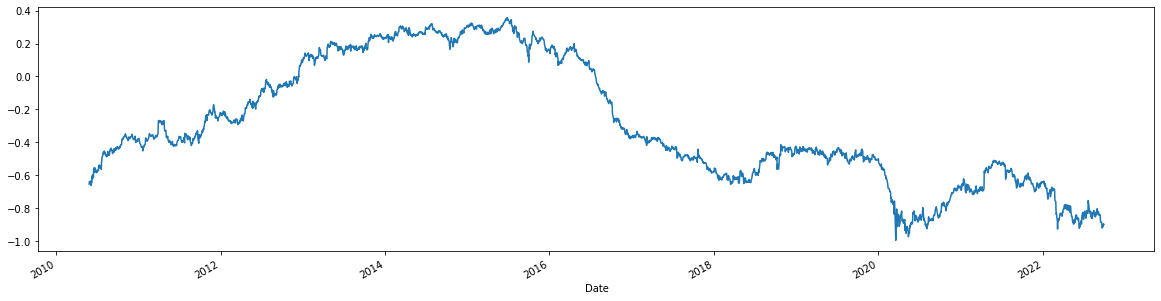

In [3]:
df = yf.download(pair, start='2010-01-01', end='2022-09-30')['Open']
df = df.apply(np.log)
ratios, betas = functiondic[func](df[pair[0]], df[pair[1]], interval)
portfolio = df[pair[0]] - ratios * df[pair[1]] - betas
portfolio = portfolio[interval:]
portfolio.plot(figsize=(20,5))

## 3-3 Split into Training and Testing Parts

In [4]:
train = portfolio[:'2014/12/31']
test = portfolio['2014/12/31':]
num_train = len(train)
print("# of training data: ", len(train))
print("# of testing data: ", len(test))

# of training data:  1158
# of testing data:  1951


## 3-4 Tuning the Parameters (In the Sample) by optimzing expcted return

Statistics
- Hit Ratio
- conditional Expected Retrun
- conditional Expected Loss
- Expected Retrun
- Tradng Frequency

In [5]:
def CalculateStatistics(signals, returns):
    hit_ratio = sum(returns > 0) / sum(abs(signals.shift(1).dropna()))
    conditional_expected_return = returns[returns > 0].mean()
    conditional_expected_loss = returns[returns < 0].mean()
    expected_return = hit_ratio * conditional_expected_return + (1- hit_ratio) * conditional_expected_loss
    trading_frequency = sum(abs(signals.shift(1).dropna()))

    print("hit_ratio: %s" %(hit_ratio))
    print("conditional_expected_return: %s" %(conditional_expected_return))
    print("conditional_expected_loss: %s" %(conditional_expected_loss))
    print("expected_return: %s" %(expected_return))
    print("trading_frequency: %s" %(trading_frequency))
    
    return expected_return

In [6]:
def signal(series, std, window):
    zscore =  (series - series.rolling(window).mean()) / series.rolling(window).std()
    signal = zscore.copy()
    signal[zscore <= 100] = 0 
    signal[zscore >= std] = -1
    signal[zscore <= - std] = 1
    return zscore, signal

In [7]:
std_threshold_set = [0.5, 1, 1.5, 2]
window_set = range(10,120,10)

optimal_std_threshold = 0
optimal_window = 0
best_expected_return = 0

for std_threshold_train in std_threshold_set:
    for window_train in window_set:
        zscore_train, signal_train = signal(train, std_threshold_train, window_train)
        ##
        return_train = train.diff() * signal_train.shift(1) # Signal lag 1 day
        ##
        expected_return_train = CalculateStatistics(signal_train, return_train)
        ##
        if(expected_return_train > best_expected_return):
            best_expected_return = expected_return_train
            optimal_std_threshold = std_threshold_train
            optimal_window = window_train
        
print("Best expected return is %s with std %s and window %s" %(best_expected_return, optimal_std_threshold, optimal_window))

hit_ratio: 0.5254237288135594
conditional_expected_return: 0.008591730088714292
conditional_expected_loss: -0.00815087641409085
expected_return: 0.0006460863246711742
trading_frequency: 885.0
hit_ratio: 0.5195968645016797
conditional_expected_return: 0.008239919531231921
conditional_expected_loss: -0.008054895857441182
expected_return: 0.0004118391261470826
trading_frequency: 893.0
hit_ratio: 0.5045045045045045
conditional_expected_return: 0.008143155438735502
conditional_expected_loss: -0.007923398218431769
expected_return: 0.00018225047347243933
trading_frequency: 888.0
hit_ratio: 0.5105204872646734
conditional_expected_return: 0.008012640896218018
conditional_expected_loss: -0.007883594391780187
expected_return: 0.00023175939312255166
trading_frequency: 903.0
hit_ratio: 0.5138568129330254
conditional_expected_return: 0.008220731706023804
conditional_expected_loss: -0.007957498973664334
expected_return: 0.0003557950822955067
trading_frequency: 866.0
hit_ratio: 0.5084337349397591
cond

## 3-5 Strategy Performance (Out of Sample)

In [8]:
zscore_test, signal_test = signal(test, optimal_std_threshold, optimal_window)
return_test = test.diff() * signal_test.shift(1)
pnl_test = np.cumprod( 1 + return_test)

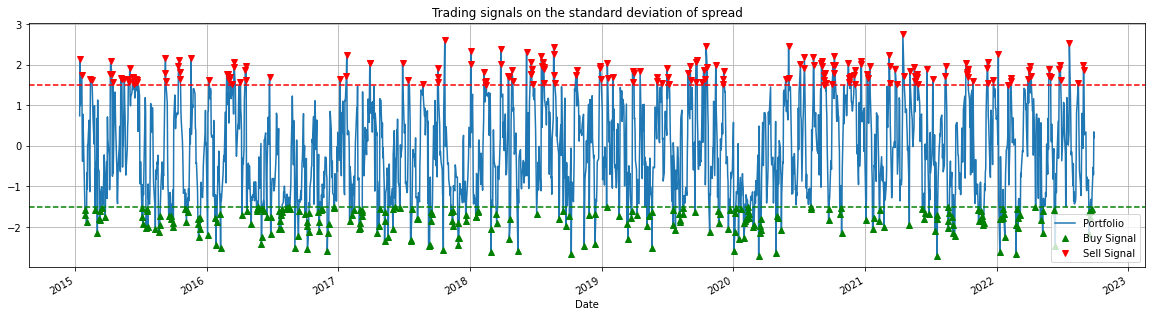

In [9]:
plt.figure(figsize=(20,5))

zscore_test.plot()
buy = zscore_test.copy()
sell = zscore_test.copy()
buy[zscore_test > -optimal_std_threshold] = np.NaN
sell[zscore_test < optimal_std_threshold] = np.NaN
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='v')
plt.legend(['Portfolio', 'Buy Signal', 'Sell Signal'])
plt.axhline(optimal_std_threshold, linestyle='--', color='red')
plt.axhline(-optimal_std_threshold, linestyle='--', color='green')
plt.grid()
plt.title("Trading signals on the standard deviation of spread")
plt.savefig('Trading signals on the standard deviation of spread.png')
plt.show()

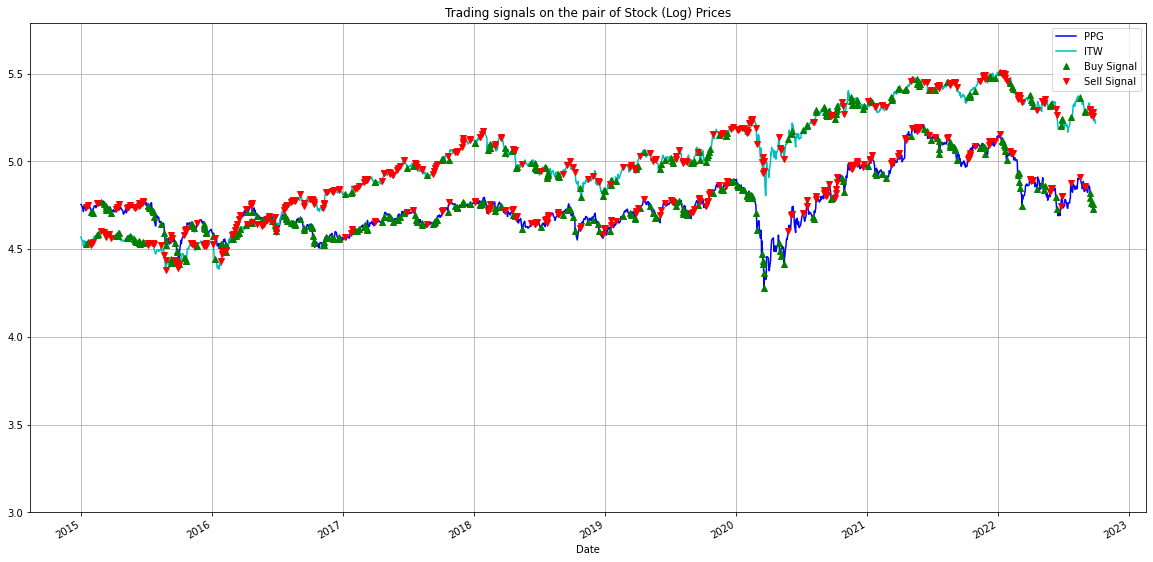

In [10]:
plt.figure(figsize=(20,10))
S1 = df[pair[0]].iloc[num_train:][-len(zscore_test):]
S2 = df[pair[1]].iloc[num_train:][-len(zscore_test):]

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# # When you buy the ratio, you buy stock S1 and sell S2
buyR[~np.isnan(buy)] = S1[~np.isnan(buy)]
sellR[~np.isnan(buy)] = S2[~np.isnan(buy)]

# # When you sell the ratio, you sell stock S1 and buy S2
buyR[~np.isnan(sell)] = S2[~np.isnan(sell)]
sellR[~np.isnan(sell)] = S1[~np.isnan(sell)]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='v')
plt.ylim(3)
plt.legend([pair[0], pair[1], 'Buy Signal', 'Sell Signal'])
plt.grid()
plt.title("Trading signals on the pair of Stock (Log) Prices")
plt.savefig('Trading signals on the pair of Stock (Log) Prices.png')

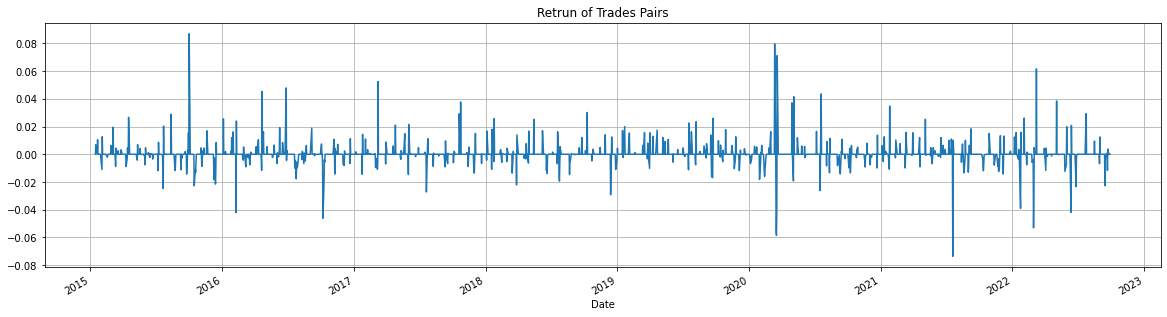

In [11]:
return_test.plot(figsize=(20,5))
plt.grid()
plt.title("Retrun of Trades Pairs")
plt.savefig('Retrun of Trades Pairs.png')

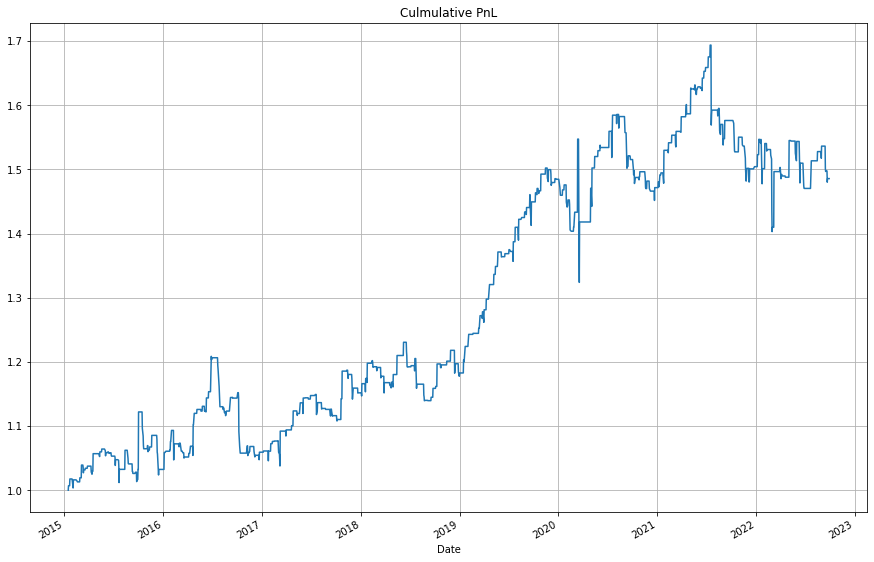

In [12]:
pnl_test.plot(figsize=(15,10))
plt.grid()
plt.title("Culmulative PnL")
plt.savefig('Culmulative PnL.png')

In [13]:
perf = ffn.core.PerformanceStats(pnl_test.dropna())

In [14]:
perf.display()

Stats for None from 2015-01-15 00:00:00 - 2022-09-29 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
48.56%              0.49  5.27%   -17.16%

Annualized Returns:
mtd     3m     6m      ytd     1y      3y     5y     10y    incep.
------  -----  ------  ------  ------  -----  -----  -----  --------
-2.09%  1.04%  -0.73%  -1.24%  -5.74%  0.83%  5.89%  -      5.27%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.49     0.60       0.59
mean    5.85%    5.39%      5.68%
vol     11.97%   9.05%      9.57%
skew    1.57     -0.20      2.07
kurt    38.20    0.56       4.49
best    8.68%    6.69%      26.07%
worst   -7.36%   -7.50%     -1.24%

Drawdowns:
max      avg       # days
-------  ------  --------
-17.16%  -3.59%     84.43

Misc:
---------------  ------
avg. up month    2.24%
avg. down month  -1.87%
up year %        71.43%
12m up %        

In [15]:
CalculateStatistics(signal_test, return_test)

hit_ratio: 0.48464912280701755
conditional_expected_return: 0.011596868732544594
conditional_expected_loss: -0.008988552332226006
expected_return: 0.0009881539294281667
trading_frequency: 456.0


0.0009881539294281667